In [1]:
!hostname

g084


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
sys.path.append('/burg/home/sga2133/ColdPoolSAMetrics/pySAMetrics')

In [4]:
import pySAMetrics
from pySAMetrics.Simulation import Simulation

In [9]:
path_3d = '/burg/old_glab/users/sga2133/SAM_simulation_storage_v1/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc'
path_2d = '/burg/old_glab/users/sga2133/SAM_simulation_storage_v1/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc'
path_1d ='/burg/old_glab/users/sga2133/SAM_simulation_storage_v1/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'

In [7]:
dataset_3d = xr.open_dataset(path_3d, engine='scipy')

In [8]:
data_folder_paths = [path_1d, path_2d, path_3d]


In [9]:
import os

def generate_simulation_paths(velocity: str, temperature: str, bowen_ratio: str, microphysic: str) -> dict:
    """
    Generate the paths to the 3D, 2D, and 1D datasets based on simulation parameters.
    
    Parameters:
    - velocity (str): Velocity value, e.g., '0'.
    - temperature (str): Temperature value, e.g., '300'.
    - bowen_ratio (str): Bowen ratio value, e.g., '1'.
    - microphysic (str): Microphysics option, e.g., '1'.
    
    Returns:
    - dict: Dictionary containing paths for 'path_3d', 'path_2d', and 'path_1d'.
    """
    # Define base directory (could be parameterized if needed)
    base_dir = '/burg/old_glab/users/sga2133/SAM_simulation_storage'
    
    # Folder name following the pattern with velocity, temperature, bowen_ratio, and microphysic
    folder_name = f'RCE_T{temperature}_U{velocity}_B{bowen_ratio}_M{microphysic}'
    
    # Base simulation path
    base_simulation_path = os.path.join(base_dir, folder_name, 'WORK/NETCDF_files')
    
    # Construct the full paths to 3D, 2D, and 1D datasets
    path_3d = os.path.join(base_simulation_path, '3D/output.nc')
    path_2d = os.path.join(base_simulation_path, f'2D/RCE_T{temperature}_U{velocity}_SAM{microphysic}MOM_B{bowen_ratio}_128x128x64_64.2Dcom_1.nc')
    path_1d = os.path.join(base_simulation_path, f'1D/RCE_T{temperature}_U{velocity}_SAM{microphysic}MOM_B{bowen_ratio}_128x128x64.nc')
    
    # Return paths in a dictionary
    return {
        'path_3d': path_3d,
        'path_2d': path_2d,
        'path_1d': path_1d
    }



In [6]:
list_files = ['RCE_T300_U0_B0.01_M1',
                'RCE_T300_U0_B0.1_M1',
                'RCE_T300_U0_B0.5_M1',
                'RCE_T300_U0_B1_M1',
                'RCE_T300_U10_B1_M1',
                'RCE_T300_U20_B1_M1',
                'RCE_T300_U2.5_B1_M1',
                'RCE_T300_U5_B1_M1',
                'RCE_T302_U0_B1_M1']

In [17]:
# Initialize the main dictionary
data_dict = {
    'RCE_T300_U0_B0.01_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '0.01', 'microphysic': '1'},
    'RCE_T300_U0_B0.1_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '0.1', 'microphysic': '1'},
    'RCE_T300_U0_B0.5_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '0.5', 'microphysic': '1'},
    'RCE_T300_U0_B1_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U10_B1_M1': {'velocity': '10', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U20_B1_M1': {'velocity': '20', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U2.5_B1_M1': {'velocity': '2.5', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U5_B1_M1': {'velocity': '5', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T302_U0_B1_M1': {'velocity': '0', 'temperature': '302', 'bowen_ratio': '1', 'microphysic': '1'}
}

# Now you can access data for a specific run
run_name = 'RCE_T302_U0_B1_M1'
dict2 = data_dict[run_name]

# Print velocity for the specific run
print(dict2['velocity'])  # Output: '0'
print(dict2['temperature']) 
print(dict2['bowen_ratio']) 
print(dict2['microphysic']) 

0
302
1
1


In [19]:
data_dict

{'RCE_T300_U0_B0.01_M1': {'velocity': '0',
  'temperature': '300',
  'bowen_ratio': '0.01',
  'microphysic': '1'},
 'RCE_T300_U0_B0.1_M1': {'velocity': '0',
  'temperature': '300',
  'bowen_ratio': '0.1',
  'microphysic': '1'},
 'RCE_T300_U0_B0.5_M1': {'velocity': '0',
  'temperature': '300',
  'bowen_ratio': '0.5',
  'microphysic': '1'},
 'RCE_T300_U0_B1_M1': {'velocity': '0',
  'temperature': '300',
  'bowen_ratio': '1',
  'microphysic': '1'},
 'RCE_T300_U10_B1_M1': {'velocity': '10',
  'temperature': '300',
  'bowen_ratio': '1',
  'microphysic': '1'},
 'RCE_T300_U20_B1_M1': {'velocity': '20',
  'temperature': '300',
  'bowen_ratio': '1',
  'microphysic': '1'},
 'RCE_T300_U2.5_B1_M1': {'velocity': '2.5',
  'temperature': '300',
  'bowen_ratio': '1',
  'microphysic': '1'},
 'RCE_T300_U5_B1_M1': {'velocity': '5',
  'temperature': '300',
  'bowen_ratio': '1',
  'microphysic': '1'},
 'RCE_T302_U0_B1_M1': {'velocity': '0',
  'temperature': '302',
  'bowen_ratio': '1',
  'microphysic': '1'

In [10]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                  velocity=velocity,
                  temperature=temperature,
                  bowen_ratio=bowen_ratio,
                  microphysic=microphysic)

{'path_3d': '/burg/old_glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/output.nc', 'path_2d': '/burg/old_glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/old_glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


In [11]:
simu.set_basic_variables_from_dataset()

In [12]:
simu.dataset_computed_3d

<xarray.Dataset>
Dimensions:                (time: 481, z: 64, y: 128, x: 128)
Dimensions without coordinates: time, z, y, x
Data variables:
    FMSE                   (time, z, y, x) float32 3.346e+05 ... 4.842e+05
    VIRTUAL_TEMPERATURE    (time, z, y, x) float32 295.1 295.1 ... 218.7 218.9
    POTENTIAL_TEMPERATURE  (time, z, y, x) float32 297.4 297.3 ... 701.1 701.7
    BUOYANCY               (time, z, y, x) float32 0.01092 0.009412 ... 0.001795
    VORTICITY              (time, z, y, x) float32 -0.001218 ... 1.232e-05
    RHO_W                  (time, z, y, x) float32 0.0 0.0 ... 0.0006529

In [13]:
simu.dataset_computed_2d

<xarray.Dataset>
Dimensions:  (time: 481, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR       (time, y, x) float32 -0.001851 0.0003133 ... -0.001574 -2.793e-05

In [14]:
variable_images=simu.dataset_3d.TABS[:,0].values
q_inf, q_sup = np.quantile(variable_images, 0.05), np.quantile(variable_images, 0.1)
low_theshold=q_sup
high_theshold=q_inf

In [16]:
simu.get_coldpool_tracking_images(variable_images =variable_images, low_threshold=q_sup, high_threshold=q_inf)

Number of workers: 32


100%|███████████████████████████████████████████████████████████████████████████████████| 481/481 [01:18<00:00,  6.10it/s]


In [17]:
simu.dataset_computed_2d

<xarray.Dataset>
Dimensions:         (time: 481, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR              (time, y, x) float32 -0.001851 0.0003133 ... -2.793e-05
    CORE_BINARY     (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 1.0 1.0
    ENVELOP_BINARY  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 0.0
    CP_BINARY       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    CP_LABELS       (time, y, x) float32 0.0 0.0 0.0 0.0 ... 580.0 580.0 580.0

In [18]:
simu.get_cape()
simu.dataset_computed_2d

<xarray.Dataset>
Dimensions:         (time: 481, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR              (time, y, x) float32 -0.001851 0.0003133 ... -2.793e-05
    CORE_BINARY     (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 1.0 1.0
    ENVELOP_BINARY  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 0.0
    CP_BINARY       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    CP_LABELS       (time, y, x) float32 0.0 0.0 0.0 0.0 ... 580.0 580.0 580.0
    CAPE            (time, y, x) float64 4.347e+03 4.593e+03 ... 4.839e+03

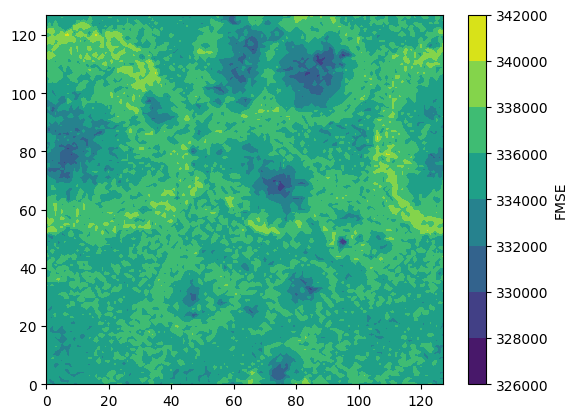

In [56]:
plt.contourf(simu.dataset_computed_3d.FMSE[9,0])
plt.colorbar(label='FMSE')

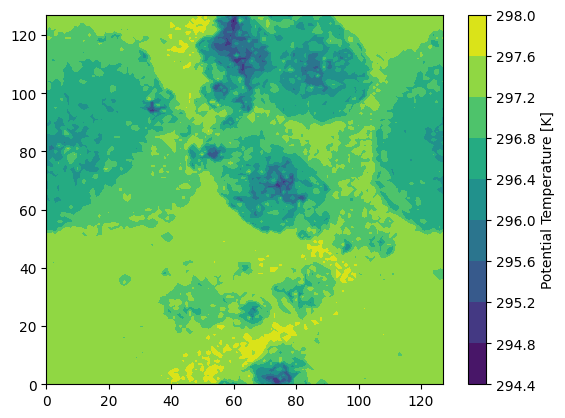

In [55]:
plt.contourf(simu.dataset_computed_3d.POTENTIAL_TEMPERATURE[9,0])
plt.colorbar(label='Potential Temperature [K]')

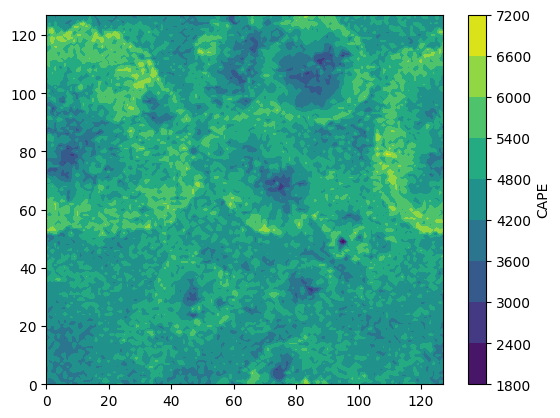

In [54]:
plt.contourf(simu.dataset_computed_2d.CAPE[9])
plt.colorbar(label='CAPE')

In [67]:
simu.dataset_computed_2d.CP_BINARY.values

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [ ]:

simu.dataset_3d.QV

In [57]:
cp_nan = np.copy(simu.dataset_computed_2d.CP_LABELS[9])
cp_nan[cp_nan==0]=np.nan


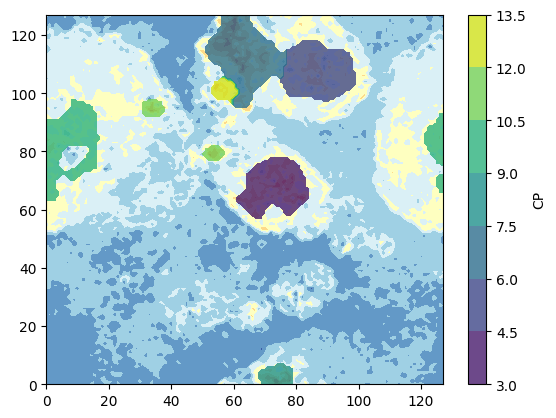

In [63]:
plt.contourf(simu.dataset_computed_3d.BUOYANCY[9,0], cmap='RdYlBu')
plt.contourf(cp_nan, alpha=0.8)
plt.colorbar(label='CP')

In [73]:
simu.dataset_1d.LHF

<xarray.DataArray 'LHF' (time: 1680)>
[1680 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.2604 0.2812 0.3021 0.3229 ... 35.2 35.22 35.24
Attributes:
    long_name:  Latent Heat Flux
    units:      W/m2

In [76]:
simu.dataset_2d.Prec.shape

(481, 128, 128)

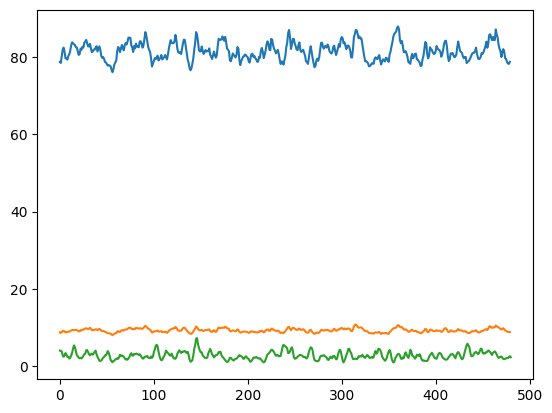

In [78]:
plt.plot(simu.dataset_1d.LHF[-480:])
plt.plot(simu.dataset_1d.SHF[-480:])
plt.plot(np.mean(simu.dataset_2d.Prec, axis=(-1,-2)))

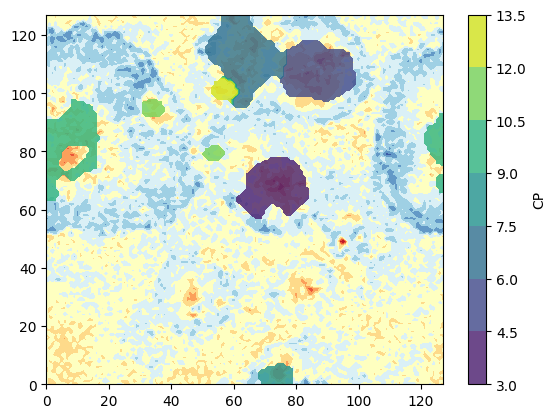

In [62]:
plt.contourf(simu.dataset_computed_2d.CAPE[9], cmap='RdYlBu')
plt.contourf(cp_nan, alpha=0.8)
plt.colorbar(label='CP')

In [35]:
from pySAMetrics.diagnotic_fmse import diagnostic_fmse_z

In [36]:
rho_w = pySAMetrics.utils.expand_array_to_tzyx_array(input_array = simu.dataset_1d.RHO.values[-481:],
                                                     final_shape = (481,64,128,128),
                                                     time_dependence=True)*simu.dataset_3d.W.values

In [37]:
output_matrix = diagnostic_fmse_z(
    fmse_array=simu.dataset_computed_3d.FMSE.values,
    z_array=simu.dataset_3d.z.values,
    data_array=simu.dataset_computed_3d.RHO_W.values,
    time_step=2)

In [38]:
from pySAMetrics.Simulation import process_time_step

In [295]:
from pySAMetrics import config
fmse = np.linspace(config.FMSE_MIN, config.FMSE_MAX, 50)


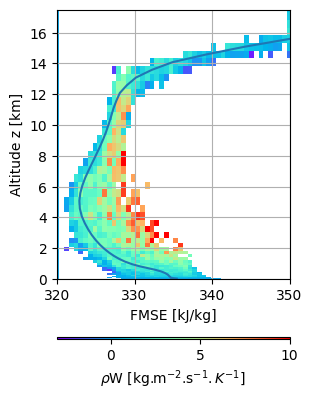

In [296]:
plt.figure(figsize=(3,5))
#fmse = np.linspace(315, 360, 50)
z = simu.dataset_3d.z.values
FF, ZZ = np.meshgrid(fmse/1000, z/1000)
im4 = plt.pcolormesh(FF, ZZ, output_matrix, vmin=-3, vmax=10, cmap='rainbow')
plt.plot(np.mean(simu.dataset_computed_3d.FMSE.values, axis=(0,2,3))/1000, z/1000)
plt.ylim(0,17.500)
plt.xlim(320.000,350.000)
plt.grid(True)
plt.xlabel('FMSE [kJ/kg]')
plt.ylabel('Altitude z [km]')
plt.colorbar(orientation='horizontal', aspect=100, shrink=1, label=r'$\rho$W [kg.m$^{-2}$.s$^{-1}$]')

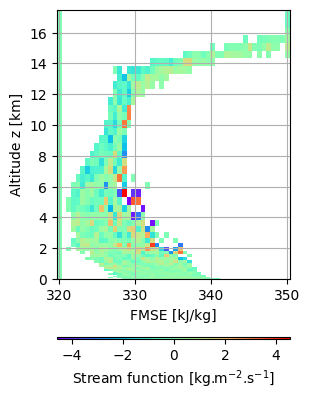

In [283]:
plt.figure(figsize=(3,5))
#fmse = np.linspace(315, 360, 50)
z = simu.dataset_3d.z.values
FF, ZZ = np.meshgrid(fmse/1000, z/1000)

output_with_zeros = np.copy(output_matrix)
output_with_zeros = np.nan_to_num(output_matrix)
output_with_zeros = np.gradient(output_with_zeros, axis=0)

nan_mask = np.isnan(output_matrix)

output_with_zeros[nan_mask] = np.nan



im4 = plt.pcolormesh(FF, ZZ, output_with_zeros, cmap='rainbow')
#plt.plot(np.mean(simu.dataset_computed_3d.FMSE.values, axis=(0,2,3))/1000, z/1000)
plt.ylim(0,17.500)
#plt.xlim(320.000,350.000)
plt.grid(True)
plt.xlabel('FMSE [kJ/kg]')
plt.ylabel('Altitude z [km]')
plt.colorbar(orientation='horizontal', aspect=100, shrink=1, label=r'Stream function [kg.m$^{-2}$.s$^{-1}$]')

In [17]:
simu.get_isentropic_dataset()

100%|███████████████████████████████████████████████████████████████████████████████████| 481/481 [03:39<00:00,  2.19it/s]


In [344]:
simu.dataset_isentropic

<xarray.Dataset>
Dimensions:  (time: 481, z: 64, fmse: 50)
Dimensions without coordinates: time, z, fmse
Data variables:
    RHO_W    (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QN       (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QP       (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

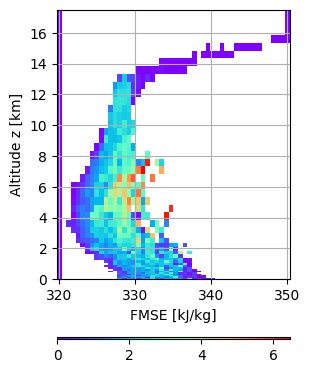

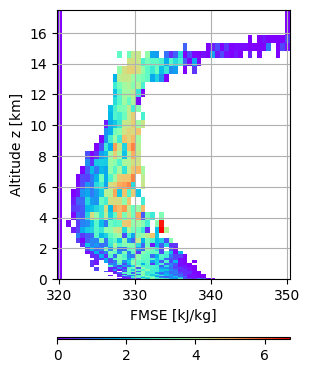

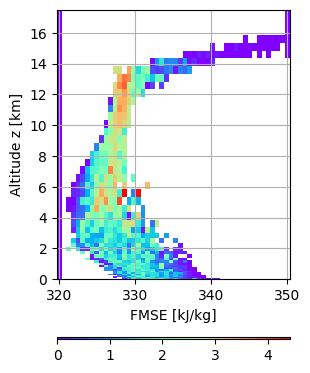

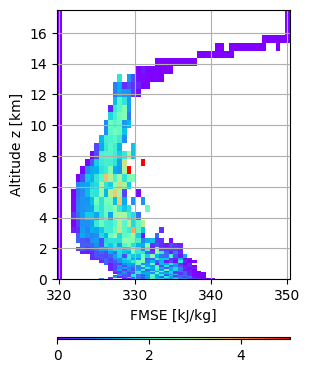

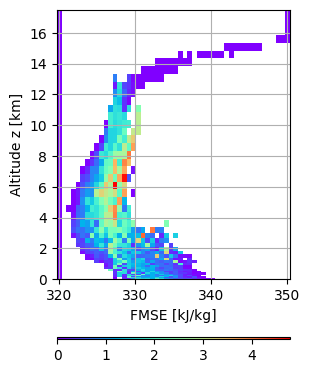

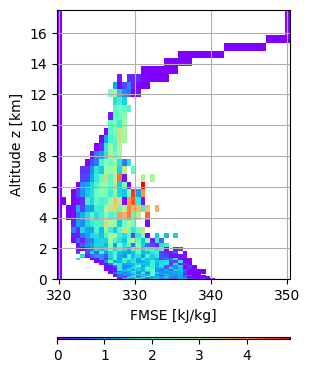

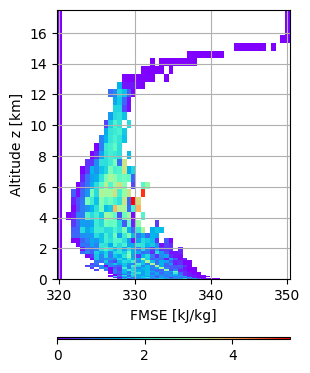

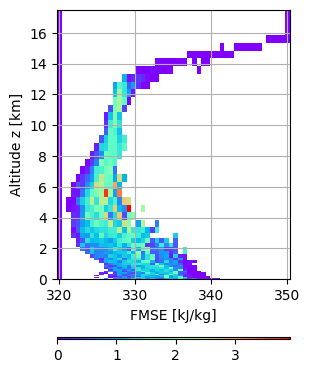

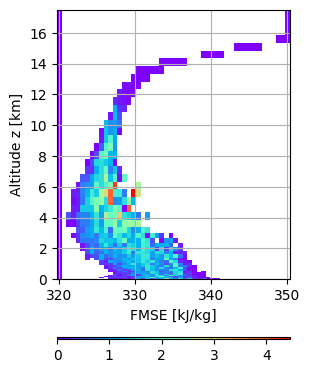

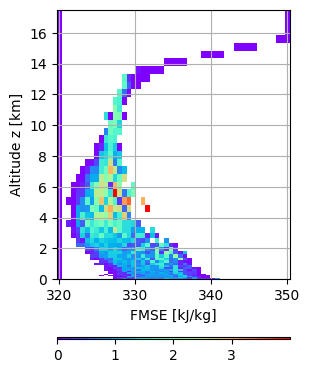

In [347]:
for i in range(10):
    plt.figure(figsize=(3,5))
    #fmse = np.linspace(315, 360, 50)
    z = simu.dataset_3d.z.values
    FF, ZZ = np.meshgrid(fmse/1000, z/1000)

    im4 = plt.pcolormesh(FF, ZZ, simu.dataset_isentropic.QP.values[i], cmap='rainbow')
    #plt.plot(np.mean(simu.dataset_computed_3d.FMSE.values, axis=(0,2,3))/1000, z/1000)
    plt.ylim(0,17.500)
    #plt.xlim(320.000,350.000)
    plt.grid(True)
    plt.xlabel('FMSE [kJ/kg]')
    plt.ylabel('Altitude z [km]')
    plt.colorbar(orientation='horizontal', aspect=100, shrink=1)
    plt.show()

In [348]:
simu.dataset_2d

<xarray.Dataset>
Dimensions:  (x: 128, y: 128, time: 481)
Coordinates:
  * x        (x) float32 0.0 1e+03 2e+03 3e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * y        (y) float32 0.0 1e+03 2e+03 3e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * time     (time) float32 30.25 30.26 30.27 30.28 ... 35.22 35.23 35.24 35.25
Data variables: (12/29)
    Prec     (time, y, x) float32 ...
    SHF      (time, y, x) float32 ...
    LHF      (time, y, x) float32 ...
    LWNS     (time, y, x) float32 ...
    LWNSC    (time, y, x) float32 ...
    LWNT     (time, y, x) float32 ...
    ...       ...
    U850     (time, y, x) float32 ...
    V850     (time, y, x) float32 ...
    ZC       (time, y, x) float32 ...
    TB       (time, y, x) float32 ...
    ZE       (time, y, x) float32 ...
    CLDC     (time, y, x) float32 ...

In [371]:
simu.set_composite_variables(
        data_name='BUOYANCY',
        variable_to_look_for_extreme='Prec',
        extreme_events_choice='max',
        x_margin=40,
        y_margin=10,
        dataset_for_variable_3d = "dataset_computed_3d",
        dataset_for_variable_2d = "dataset_2d",
        parallelize = False
    )

100%|██████████████████████████████████████████████████████████████████████| 481/481 [00:11<00:00, 41.45it/s]


In [373]:
simu.save(backup_folder_path='/burg/old_glab/users/sga2133/pySAMetrics_saved_simulations')

New dataset saved at /burg/old_glab/users/sga2133/pySAMetrics_saved_simulations/simulation_SAM_RCE_V0_T305_B1_M1/dataset_computed_2d
New dataset saved at /burg/old_glab/users/sga2133/pySAMetrics_saved_simulations/simulation_SAM_RCE_V0_T305_B1_M1/dataset_computed_3d
New dataset saved at /burg/old_glab/users/sga2133/pySAMetrics_saved_simulations/simulation_SAM_RCE_V0_T305_B1_M1/dataset_isentropic


In [379]:
xr.open_dataset(path)

<xarray.Dataset>
Dimensions:  (time: 481, z: 64, fmse: 50)
Dimensions without coordinates: time, z, fmse
Data variables:
    RHO_W    (time, z, fmse) float64 ...
    QN       (time, z, fmse) float64 ...
    QP       (time, z, fmse) float64 ...

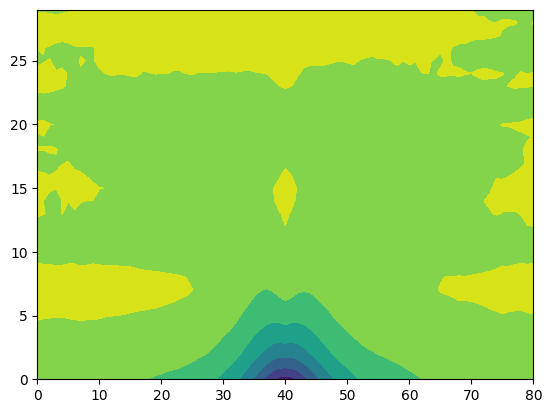

In [365]:
plt.contourf(np.mean(simu.BUOYANCY_composite_Prec[:30], axis=1))

In [354]:

data_3d = getattr(getattr(simu, 'dataset_computed_3d'), 'BUOYANCY')

In [355]:
data_3d

<xarray.DataArray 'BUOYANCY' (time: 481, z: 64, y: 128, x: 128)>
array([[[[ 1.09227067e-02,  9.41217318e-03,  1.09429955e-02, ...,
           1.48578025e-02,  1.13477660e-02,  1.36120440e-02],
         [ 6.13039080e-03,  7.53237633e-03,  1.02531621e-02, ...,
           1.16003668e-02,  1.01780919e-02,  1.17707960e-02],
         [ 7.61556253e-03,  7.91888684e-03,  7.39643909e-03, ...,
           8.90595745e-03,  1.05169220e-02,  9.20826662e-03],
         ...,
         [ 1.00786742e-02,  1.14766024e-02,  1.09095192e-02, ...,
           1.19067347e-02,  1.29100373e-02,  1.15344264e-02],
         [ 9.66883264e-03,  7.15093920e-03,  8.80146772e-03, ...,
           1.14187784e-02,  1.28349662e-02,  1.22415069e-02],
         [ 9.41217318e-03,  1.06914099e-02,  6.82834070e-03, ...,
           1.15090655e-02,  1.23733869e-02,  1.51915606e-02]],

        [[ 8.43987614e-03,  6.97989063e-03,  8.61361157e-03, ...,
           1.14766881e-02,  8.91637895e-03,  1.00918850e-02],
         [ 2.73709255e-03,  5.65503212e-03,  9.74644627e-03, ...,
           9.65500716e-03,  9.12364107e-03,  1.02229491e-02],
         [ 6.31542923e-03,  5.76272793e-03,  8.57906789e-03, ...,
           6.98395493e-03,  8.87777004e-03,  7.97251891e-03],
...
          -1.34709186e-03, -2.09040614e-03,  3.44543398e-04],
         [-7.04561453e-03, -2.88596400e-03,  3.36409244e-03, ...,
          -4.43541724e-03, -5.93196601e-04,  6.39686780e-03],
         [-4.25025029e-03, -3.26291169e-03, -7.00593600e-03, ...,
           6.41538482e-03,  6.58732560e-03, -6.89086795e-04]],

        [[ 3.09780706e-03, -2.45063659e-03, -2.51350855e-03, ...,
          -9.34467558e-03, -6.74506009e-04,  1.16996362e-03],
         [ 7.85898519e-05,  1.82806829e-03, -1.44673663e-03, ...,
           3.09780706e-03,  4.98601375e-03,  3.88028868e-03],
         [-1.35379564e-03,  4.00876580e-03,  1.05583761e-03, ...,
           2.80189910e-03,  3.37868021e-03, -1.58546492e-04],
         ...,
         [ 2.54904479e-03,  4.95252758e-03,  4.02790075e-03, ...,
           6.46897033e-03,  6.27898751e-03,  6.21884887e-04],
         [ 5.69127174e-03,  1.33807771e-03, -1.31347554e-03, ...,
           6.07397035e-03,  4.16867901e-03, -4.15091077e-03],
         [ 4.45091911e-03,  4.02653404e-03,  6.48673810e-03, ...,
          -5.61883301e-03, -5.52315824e-03,  1.79458223e-03]]]],
      dtype=float32)
Dimensions without coordinates: time, z, y, x
Attributes:
    long_name:  Buoyancy
    units:      m s^-2

In [19]:
simu.dataset_computed_2d

<xarray.Dataset>
Dimensions:         (time: 481, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR              (time, y, x) float32 -0.001851 0.0003133 ... -2.793e-05
    CORE_BINARY     (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 1.0 1.0
    ENVELOP_BINARY  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 0.0
    CP_BINARY       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    CP_LABELS       (time, y, x) float32 0.0 0.0 0.0 0.0 ... 580.0 580.0 580.0

In [20]:
simu.dataset_isentropic

<xarray.Dataset>
Dimensions:  (time: 481, z: 64, fmse: 50)
Dimensions without coordinates: time, z, fmse
Data variables:
    RHO_W    (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QN       (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QP       (time, z, fmse) float64 0.0 nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

In [64]:
import matplotlib.gridspec as gridspec

from tqdm import tqdm

In [65]:
#n_t = simulation.dataset_3d.time.values.shape[0]
n_t=300
for i_time in tqdm(range(n_t)):
    # Create a figure
    fig = plt.figure(figsize=(20, 20), constrained_layout=True)

    gs = gridspec.GridSpec(5, 2, height_ratios=[3, 5, 0.1, 5, 0.1], width_ratios=[0.5, 0.5])

    # Add subplots
    # Large panel on the top (spans both columns)
    ax1 = fig.add_subplot(gs[0, :])

    # Two small panels on the left below the large panel
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[3, 0])

    # One larger panel on the right
    ax4 = fig.add_subplot(gs[1:-1, 1])

    # Colorbar space below the small panels and the right panel
    cax1 = fig.add_subplot(gs[2, 0])
    cax2 = fig.add_subplot(gs[4, 0])
    cax3 = fig.add_subplot(gs[4, 1])



    PW = simu.dataset_computed_3d.RHO_W.values[i_time]
    X, Y = simu.dataset_3d.x.values/1000, simu.dataset_3d.y.values/1000
    XX,YY = np.meshgrid(X,Y)
    im2 = ax2.pcolormesh(XX,YY,PW[40], cmap='Spectral_r')
    ax2.set_xlabel('x [km]')
    ax2.set_ylabel('y [km]')
    cbar2 = plt.colorbar(im2, cax=cax1, orientation='horizontal', label="Vertical Mass Flux at 13km [kg.m$^{-2}$.s$^{-1}$]")

    ax2.grid(True)


    BUOYANCY= simu.dataset_computed_3d.BUOYANCY[i_time]
    CP = simu.dataset_computed_2d.CP_LABELS.values[i_time]
    CP[CP==0]=np.nan
    X, Y = simu.dataset_3d.x.values/1000, simu.dataset_3d.y.values/1000
    XX,YY = np.meshgrid(X,Y)
    im3 = ax3.pcolormesh(XX,YY,BUOYANCY[0], vmin=-0.1, vmax=0.05, cmap='coolwarm')
    ax3.pcolormesh(XX,YY,CP%8, alpha=0.8, vmin=0, vmax=7, cmap='Set2')

    ax3.set_xlabel('x [km]')
    ax3.set_ylabel('y [km]')
    cbar3 = plt.colorbar(im3, cax=cax2, orientation='horizontal', label='Buoyancy [kJ/kg]')

    ax3.grid(True)

    fmse = np.linspace(320, 350, 50)
    z = simu.dataset_3d.z.values/1000
    FF, ZZ = np.meshgrid(fmse, z)
    fmse_z_matrix = simu.dataset_isentropic.RHO_W.values[i_time]
    im4 = ax4.pcolormesh(FF, ZZ, fmse_z_matrix, vmin=-2, vmax=15, cmap='rainbow')
    ax4.set_xlim(320, 350)
    ax4.set_ylim(0,16)
    ax4.set_xlabel('FMSE')
    ax4.set_ylabel('z [km]')
    cbar4 = plt.colorbar(im4, cax=cax3, orientation='horizontal', label=r"$\rho$ W [kg.m$^{-2}$.s$^{-1}$]")
    ax4.grid(True)

    fmse_in_time = np.var(simu.dataset_2d.PW.values, axis=(-1,-2))

    ax1.plot(simu.dataset_3d.time.values, fmse_in_time)
    ax1.scatter(simu.dataset_3d.time.values[i_time],fmse_in_time[i_time], marker='+', c='r')
    ax1.set_xlabel('Time [days]')
    ax1.set_ylabel(r'$\mathrm{std}^2$(PW) [mm$^2$]')
    ax1.grid(True)

    path_dir_img = '/burg/glab_new/users/sga2133/img_isentropic_U0'
    os.makedirs(path_dir_img, exist_ok=True)
    path_fig = os.path.join(path_dir_img, f'multi_plot_{str(i_time).zfill(4)}')
    plt.savefig(path_fig)



 ... (more hidden) ...

/local/ipykernel_1994932/2322525968.py:75: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(path_fig)
 ... (more hidden) .../local/ipykernel_1994932/2322525968.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 20), constrained_layout=True)
 ... (more hidden) ...

In [39]:
simu.dataset_3d.z[40]

<xarray.DataArray 'z' ()>
array(13081.868, dtype=float32)
Coordinates:
    z        float32 1.308e+04
Attributes:
    units:      m
    long_name:  height

In [14]:
from pySAMetrics.utils_3d_functions import get_3d_image, get_sequence_images

In [16]:

path_netcdf = path_3d
ds = xr.open_dataset(path_netcdf)
xr_var_2d = ds.TABS[:,0,:,:]
xr_var_3d = ds.QN[ :, :, :] + ds.QP[ :, :, :]

x= ds.x.values
y= ds.y.values
z= ds.z.values

get_3d_image(xr_var_2d, xr_var_3d,x=x, y=y, z=z,  outname='ColdPoolSAMetrics/3d_fig_test_dataset_fdsd')

TypeError: get_3d_image() missing 1 required positional argument: 'i_time'

  0%|                                                                                   | 0/2 [00:00<?, ?it/s]

**** (128, 128, 64)
(128, 128, 64)
0.01210801
0.0
0.0 44.800938


 50%|█████████████████████████████████████▌                                     | 1/2 [00:09<00:09,  9.62s/it]

ColdPoolSAMetrics/img_3d/3d_fig_test_100.jpeg
**** (128, 128, 64)
(128, 128, 64)
0.014637265
0.0
0.0 43.852688


100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:17<00:00,  8.87s/it]

ColdPoolSAMetrics/img_3d/3d_fig_test_101.jpeg


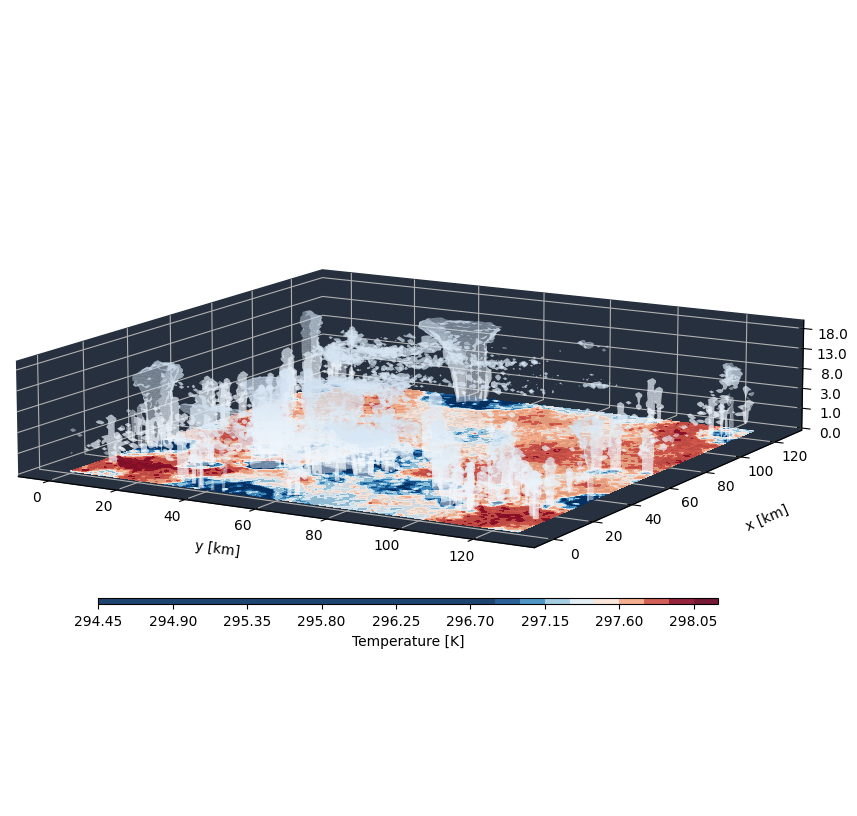

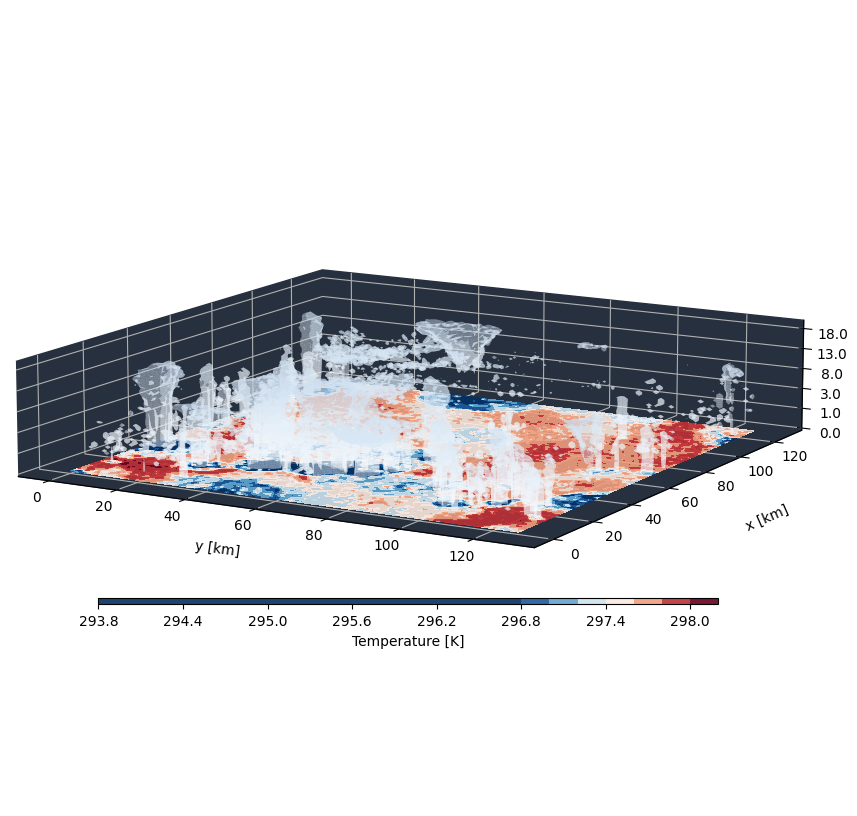

In [15]:
get_sequence_images(i_start=100, i_stop=102, xr_var_2d=xr_var_2d, xr_var_3d=xr_var_3d,i_time = 110,x=x, y=y, z=z,  outname='ColdPoolSAMetrics/img_3d/3d_fig_test')

In [30]:
import os

In [31]:
data_dict = {
    'RCE_T300_U0_B0.1_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '0.01', 'microphysic': '1'},
    'RCE_T300_U0_B0.5_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '0.5', 'microphysic': '1'},
    'RCE_T300_U0_B1_M1': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U0_B1_M2': {'velocity': '0', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '2'},
    'RCE_T300_U10_B1_M1': {'velocity': '10', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U20_B1_M1': {'velocity': '20', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U2.5_B1_M1': {'velocity': '2.5', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T300_U5_B1_M1': {'velocity': '5', 'temperature': '300', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T302_U0_B1_M1': {'velocity': '0', 'temperature': '302', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T305_U0_B1_M1': {'velocity': '0', 'temperature': '305', 'bowen_ratio': '1', 'microphysic': '1'},
    'RCE_T295_U0_B1_M1': {'velocity': '0', 'temperature': '295', 'bowen_ratio': '1', 'microphysic': '1'}

}

In [32]:

def generate_simulation_paths(velocity: str, temperature: str, bowen_ratio: str, microphysic: str) -> dict:
    """
    Generate the paths to the 3D, 2D, and 1D datasets based on simulation parameters.
    
    Parameters:
    - velocity (str): Velocity value, e.g., '0'.
    - temperature (str): Temperature value, e.g., '300'.
    - bowen_ratio (str): Bowen ratio value, e.g., '1'.
    - microphysic (str): Microphysics option, e.g., '1'.
    
    Returns:
    - dict: Dictionary containing paths for 'path_3d', 'path_2d', and 'path_1d'.
    """
    # Define base directory (could be parameterized if needed)
    base_dir = '/burg/old_glab/users/sga2133/SAM_simulation_storage'
    
    # Folder name following the pattern with velocity, temperature, bowen_ratio, and microphysic
    folder_name = f'RCE_T{temperature}_U{velocity}_B{bowen_ratio}_M{microphysic}'
    
    # Base simulation path
    base_simulation_path = os.path.join(base_dir, folder_name, 'WORK/NETCDF_files')
    
    # Construct the full paths to 3D, 2D, and 1D datasets
    path_3d = os.path.join(base_simulation_path, '3D/dataset_3d.nc')
    path_2d = os.path.join(base_simulation_path, f'2D/RCE_T{temperature}_U{velocity}_SAM{microphysic}MOM_B{bowen_ratio}_128x128x64_64.2Dcom_1.nc')
    path_1d = os.path.join(base_simulation_path, f'1D/RCE_T{temperature}_U{velocity}_SAM{microphysic}MOM_B{bowen_ratio}_128x128x64.nc')
    
    # Return paths in a dictionary
    return {
        'path_3d': path_3d,
        'path_2d': path_2d,
        'path_1d': path_1d
    }

In [33]:
from tqdm import tqdm

In [40]:
list_files = ['RCE_T300_U0_B0.1_M1',
        'RCE_T300_U0_B0.5_M1',
        'RCE_T300_U0_B1_M1',
        'RCE_T300_U0_B1_M2',
        'RCE_T300_U2.5_B1_M1',
        'RCE_T300_U5_B1_M1',
        'RCE_T300_U10_B1_M1',
        'RCE_T300_U20_B1_M1',
        'RCE_T295_U0_B1_M1',
        'RCE_T302_U0_B1_M1',
        'RCE_T305_U0_B1_M1']


for file in tqdm(list_files):
        parameters = data_dict[file]
        #print(parameters)
        paths = generate_simulation_paths(**parameters)
        path_netcdf = paths['path_3d'] #3d
        os.path.isfile(path_netcdf)

        os.makedirs(f'~/ColdPoolSAMetrics/img_{file}', exist_ok=True)





100%|███████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2733.58it/s]


In [35]:
for file in tqdm(list_files):
                parameters = data_dict[file]
                #print(parameters)
                paths = generate_simulation_paths(**parameters)

100%|█████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 111712.70it/s]


In [41]:
22

22